## Overview
On 14 March 2019, tropical Cyclone Idai made landfall at the port of Beira, Mozambique, before moving across the region. Millions of people in Malawi, Mozambique and Zimbabwe have been affected by what is the worst natural disaster to hit southern Africa in at least two decades.

In recent decades, countries across Africa have experienced an increase in the frequency and severity of floods. Malawi has been hit with major floods in 2015 and again in 2019. In fact, between 1946 and 2013, floods accounted for 48% of major disasters in Malawi.

The objective of this challenge is to build a machine learning model that helps predict the location and extent of floods in southern Malawi.

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# df = pd.read_csv('data/from_zindi/Train.csv')
train = pd.read_csv('data/final_train_data/train.csv')
train.head()

,DISTRICT,Square_ID,TPI,X,Y,clay_10,clay_200,elevation,landcover_10,landcover_11,...,intensity_week7,intensity_week8,intensity_week9,intensity_week10,intensity_week11,intensity_week12,intensity_week13,intensity_week14,intensity_week15,intensity_week16
0,Chikwawa,4e3c3896-14ce-11ea-bce5-f49634744a41,57.0,34.26,-15.91,37.0,40.0,887.764222,0,0,...,14.155139,16.151628,17.740277,16.118432,17.324938,18.621053,17.81788,16.61403,16.617034,15.784999
1,Chikwawa,4e3c3897-14ce-11ea-bce5-f49634744a41,112.0,34.26,-15.90,29.0,36.0,743.403912,0,0,...,14.155139,16.151628,17.740277,16.118432,17.324938,18.621053,17.81788,16.61403,16.617034,15.784999
2,Chikwawa,4e3c3898-14ce-11ea-bce5-f49634744a41,0.0,34.26,-15.89,27.0,33.0,565.728343,0,0,...,14.155139,16.151628,17.740277,16.118432,17.324938,18.621053,17.81788,16.61403,16.617034,15.784999
3,Chikwawa,4e3c3899-14ce-11ea-bce5-f49634744a41,-4.0,34.26,-15.88,23.0,29.0,443.392774,1,0,...,14.155139,16.151628,17.740277,16.118432,17.324938,18.621053,17.81788,16.61403,16.617034,15.784999
4,Chikwawa,4e3c389a-14ce-11ea-bce5-f49634744a41,3.0,34.26,-15.87,23.0,30.0,437.443428,1,0,...,14.155139,16.151628,17.740277,16.118432,17.324938,18.621053,17.81788,16.61403,16.617034,15.784999


In [3]:
# Previewing some statistical summaries of the dataframe
# Transposing for a better view
train.describe().T

,count,mean,std,min,25%,50%,75%,max
TPI,16142.0,0.085863,19.530495,-181.000000,-4.000000,0.000000,2.000000,270.000000
X,16264.0,35.074606,0.387730,34.260000,34.770000,35.050000,35.380000,35.850000
Y,16264.0,-15.813651,0.359585,-16.640000,-16.070000,-15.800000,-15.520000,-15.210000
clay_10,16229.0,25.415306,6.873567,0.000000,22.000000,25.000000,29.000000,45.000000
clay_200,16229.0,32.036293,7.785347,0.000000,29.000000,32.000000,36.000000,52.000000
elevation,16264.0,592.090333,355.690276,45.541444,326.968499,623.000000,752.071011,2803.303645
landcover_10,16466.0,0.292542,0.454944,0.000000,0.000000,0.000000,1.000000,1.000000
landcover_11,16466.0,0.010081,0.099902,0.000000,0.000000,0.000000,0.000000,1.000000
landcover_12,16466.0,0.373558,0.483763,0.000000,0.000000,0.000000,1.000000,1.000000
landcover_13,16466.0,0.002551,0.050442,0.000000,0.000000,0.000000,0.000000,1.000000


In [4]:
# Deal with NA values
#train.dropna(inplace=True)
train = train.fillna(0)

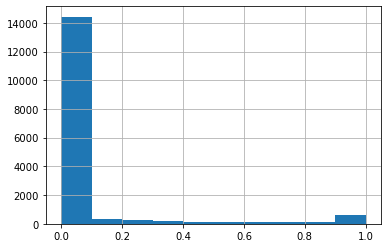

In [5]:
# Target variable distribution
train['target_2015'].hist()

In [6]:
# shape and size of the dataframe
train.shape, train.size

((16466, 39), 642174)

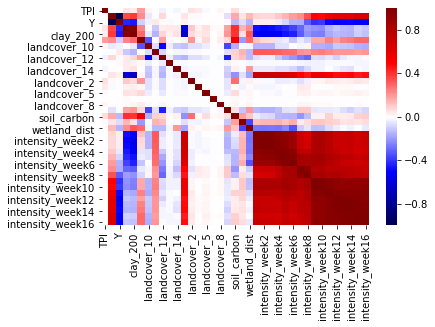

In [7]:
## Plot correlation matrix
import seaborn as sns
#sns.pairplot(train, plot_kws=dict(alpha=.1, edgecolor='none'));
# corr matrix
sns.heatmap(train.corr(), cmap="seismic", annot=False, vmin=-1, vmax=1);

In [8]:
# Removing unimportant or correlated variables
train = train.drop(columns=['clay_200', 'landcover_11',
                            'landcover_13', 'landcover_14', 'landcover_17', 'landcover_2',
                            'landcover_4', 'landcover_5', 'landcover_7', 'landcover_8', 'intensity_week1', 'intensity_week2', 'intensity_week3', 'intensity_week4',
                            'intensity_week5', 'intensity_week6', 'intensity_week7', 'intensity_week8',
                            'intensity_week9', 'intensity_week10', 'intensity_week11', 'intensity_week12',
                            'intensity_week13', 'intensity_week14', 'intensity_week15'])

train.columns

Index(['DISTRICT', 'Square_ID', 'TPI', 'X', 'Y', 'clay_10', 'elevation',
       'landcover_10', 'landcover_12', 'landcover_9', 'soil_carbon',
       'target_2015', 'wetland_dist', 'intensity_week16'],
      dtype='object')

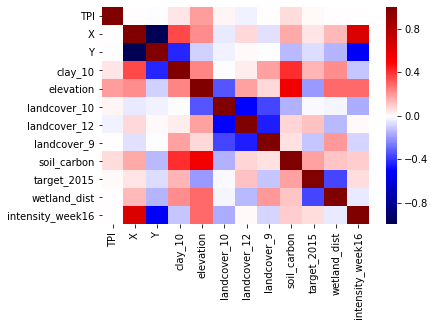

In [9]:
sns.heatmap(train.corr(), cmap="seismic", annot=False, vmin=-1, vmax=1);

If I have time try converting precip to the Coefficient Variation, which is simply the standard deviation divided by the average annual rainfall.

## Data Cleaning

#### Train and Test Datasets

In [ ]:
# Separate the target variable
# target = train.target_2015

# Aligning the training and testing datasets
# train, test = train.align(test, join = 'inner', axis = 1)
# test.head(3)
# target.hist()

In [ ]:
# Transfrom target variable
# target = np.log(target + 1) # add 1 to make sure there are not 0's in the data before taking log
# target.hist()

In [10]:
train.DISTRICT.unique()

array(['Chikwawa', 0, 'Mwanza', 'Neno', 'Ntcheu', 'Blantyre', 'Balaka',
       'Thyolo', 'Nsanje', 'Zomba', 'Chiradzulu', 'Machinga', 'Mulanje',
       'Phalombe'], dtype=object)

In [11]:
train['DISTRICT'] = train['DISTRICT'].replace(0, 'other', regex=True)
train.DISTRICT.unique()

array(['Chikwawa', 'other', 'Mwanza', 'Neno', 'Ntcheu', 'Blantyre',
       'Balaka', 'Thyolo', 'Nsanje', 'Zomba', 'Chiradzulu', 'Machinga',
       'Mulanje', 'Phalombe'], dtype=object)

In [12]:
from sklearn.model_selection import train_test_split

# Function to split testing and training data
def get_group_split_data(df, test_size=.2, seed=42):
    '''This function splits the data by distric to maintain spatial independence of train and test. 
    If we use points right next to each other for training and testing we would basically 
    be testing our model with training points.
    '''
    rs = np.random.RandomState(seed)
    
    total_fields = df['DISTRICT'].unique() 
    test_fields = rs.choice(total_fields, 
                           size=int(total_fields.shape[0] * test_size), 
                           replace=False)

    df_train = df[~df['DISTRICT'].isin(test_fields)]
    df_test = df[df['DISTRICT'].isin(test_fields)] 

    y_train, y_test = df_train['target_2015'], df_test['target_2015']
    X_train = df_train.drop(['DISTRICT','Square_ID','target_2015','X', 'Y'],axis=1) 
    X_test = df_test.drop(['DISTRICT','Square_ID','target_2015', 'X', 'Y'],axis=1)

    return X_train, X_test, y_train, y_test

In [13]:
# Spliting the data into features and target variable
X, X_test, y, y_test = get_group_split_data(df=train)

# X = train.drop(['Square_ID','target_2015'], axis=1)
# y = target

# # hold out 20% of the data for final testing
# X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)


## Comparing different models

In [14]:
from sklearn.model_selection import KFold, GroupKFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor
# import warnings
# warnings.filterwarnings('ignore')

In [15]:
# Creating a list of algorithms
models = [RandomForestRegressor(), GradientBoostingRegressor(), AdaBoostRegressor(),
          DecisionTreeRegressor(),  XGBRegressor(objective='reg:squarederror'),
          KNeighborsRegressor(), LinearRegression(), CatBoostRegressor(logging_level='Silent')]

# Creating lists of the algorithms, to store the accuracy scores of each fold
RandomForest, GradientBoosting, AdaBoost, DecisionTree, XGB, SVR, KNeighbors, Linear, Cat = ([] for x in range(9))

# List of each algorithm
model_list = [RandomForest, GradientBoosting, AdaBoost,
              DecisionTree, XGB, KNeighbors, Linear, Cat]

# Creating a cross validation of 10 folds
# random_state=42, shuffle=True
kfold = KFold(n_splits=10)

# Iterating through each model and appending the scores of each fold to the appriopriate list
for i, j in zip(models, model_list):
    j.extend(list(cross_val_score(
        i, X, y, scoring='neg_mean_squared_error', cv=kfold)))

# Creating a function to convert neg_mean_squared_error to a square root
def sq(lis):
    new_lis = []
    lis = np.array(lis)
    for i in lis:
        i = np.sqrt(i*-1)
        new_lis.append(i)
    return new_lis

# Creating a dataframe of all the rmses from the iterations for each model
rmses = pd.DataFrame({'Fold': np.arange(1, 11), 'RandomForest': sq(RandomForest), 'GradientBoosting': sq(GradientBoosting), 'Adaboost': sq(AdaBoost), 'DecisionTree': sq(DecisionTree),
                      'XGB': sq(XGB), 'Kneighbors': sq(KNeighbors), 'Linear': sq(Linear), 'Cat': sq(Cat)})
# Setting the index
rmses.set_index('Fold', inplace=True)

# Calculating the mean and standard deviation rmse of each algorithm
rmses.loc['mean'] = rmses.mean()
rmses.loc['std'] = rmses.std()

# Previewing the rmses dataframe
rmses

,RandomForest,GradientBoosting,Adaboost,DecisionTree,XGB,Kneighbors,Linear,Cat
Fold,,,,,,,,
1,0.096275,0.100456,0.129252,0.101008,0.101806,0.095657,0.142549,0.096854
2,0.040482,0.045207,0.095028,0.080704,0.044054,0.048902,0.108184,0.036430
3,0.066335,0.065523,0.107438,0.079736,0.066784,0.075934,0.103071,0.069384
4,0.133600,0.128898,0.146556,0.153893,0.128353,0.158401,0.159271,0.129286
5,0.167863,0.156431,0.192637,0.214944,0.155416,0.167227,0.251939,0.155867
6,0.151328,0.155222,0.170082,0.199557,0.155629,0.153391,0.252977,0.149121
7,0.131868,0.133831,0.155250,0.192857,0.129794,0.151043,0.199816,0.132467
8,0.069366,0.083419,0.093943,0.071053,0.083387,0.095773,0.120502,0.069512
9,0.214316,0.217067,0.198466,0.254151,0.215866,0.213167,0.216826,0.213976


In [16]:
# Arranging the models in ascending order
rmses.loc['mean'].sort_values()

Cat                 0.131826
XGB                 0.133775
GradientBoosting    0.135033
RandomForest        0.135457
Kneighbors          0.142419
Adaboost            0.155552
DecisionTree        0.168596
Linear              0.182951
Name: mean, dtype: float64

In [17]:
# Calculate prediction for best models
xgboost = XGBRegressor(objective ='reg:squarederror')
catboost = CatBoostRegressor(logging_level='Silent')

xgboost.fit(X, y)
catboost.fit(X, y)

ypred = catboost.predict(X_test)
mse = mean_squared_error(y_test,ypred)
print("Catboost MSE: %.2f" % mse)
print("Catboost RMSE: %.2f" % np.sqrt(mse))

ypred = xgboost.predict(X_test)
mse = mean_squared_error(y_test,ypred)
print("XGBboost MSE: %.2f" % mse)
print("XGBboost RMSE: %.2f" % np.sqrt(mse))

Catboost MSE: 0.03
Catboost RMSE: 0.16
XGBboost MSE: 0.02
XGBboost RMSE: 0.16


[Text(0, 0.5, 'Residuals'),
 Text(0.5, 0, 'Predicted'),
 Text(0.5, 1.0, 'Residual plot')]

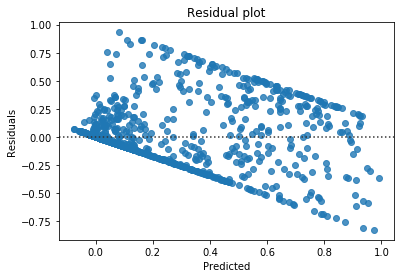

In [18]:
# create residual plot
#X_pred = lm.predict(X_test)
y_pred = catboost.predict(X_test)
res = y_test - y_pred
ax = sns.residplot(y_pred, res)
ax.set(title="Residual plot" ,xlabel="Predicted", ylabel="Residuals")
#plt.savefig("outputs/residual_plot.svg")

## Predicting 2019 Flood
- Training the top model with all of the 2015 data and predicting it on 2019 data

In [19]:
# Join test with precip values
test = pd.read_csv('data/final_train_data/test_2019.csv')
test.head()

,DISTRICT,Square_ID,TPI,X,Y,clay_10,clay_200,elevation,landcover_10,landcover_11,...,intensity_week8,intensity_week9,intensity_week10,intensity_week11,intensity_week12,intensity_week13,intensity_week14,intensity_week15,intensity_week16,target_2019
0,Chikwawa,4e3c3896-14ce-11ea-bce5-f49634744a41,57.0,34.26,-15.91,37.0,40.0,887.764222,0,0,...,16.151628,17.740277,16.118432,17.324938,18.621053,17.81788,16.61403,16.617034,15.784999,0.0
1,Chikwawa,4e3c3897-14ce-11ea-bce5-f49634744a41,112.0,34.26,-15.90,29.0,36.0,743.403912,0,0,...,16.151628,17.740277,16.118432,17.324938,18.621053,17.81788,16.61403,16.617034,15.784999,0.0
2,Chikwawa,4e3c3898-14ce-11ea-bce5-f49634744a41,0.0,34.26,-15.89,27.0,33.0,565.728343,0,0,...,16.151628,17.740277,16.118432,17.324938,18.621053,17.81788,16.61403,16.617034,15.784999,0.0
3,Chikwawa,4e3c3899-14ce-11ea-bce5-f49634744a41,-4.0,34.26,-15.88,23.0,29.0,443.392774,1,0,...,16.151628,17.740277,16.118432,17.324938,18.621053,17.81788,16.61403,16.617034,15.784999,0.0
4,Chikwawa,4e3c389a-14ce-11ea-bce5-f49634744a41,3.0,34.26,-15.87,23.0,30.0,437.443428,1,0,...,16.151628,17.740277,16.118432,17.324938,18.621053,17.81788,16.61403,16.617034,15.784999,0.0


In [20]:
# Removing unimportant or correlated variables
test = test.drop(columns=['clay_200', 'landcover_11',
                            'landcover_13', 'landcover_14', 'landcover_17', 'landcover_2',
                            'landcover_4', 'landcover_5', 'landcover_7', 'landcover_8', 'intensity_week1', 'intensity_week2', 'intensity_week3', 'intensity_week4',
                            'intensity_week5', 'intensity_week6', 'intensity_week7', 'intensity_week8',
                            'intensity_week9', 'intensity_week10', 'intensity_week11', 'intensity_week12',
                            'intensity_week13', 'intensity_week14', 'intensity_week15'])

test.columns

Index(['DISTRICT', 'Square_ID', 'TPI', 'X', 'Y', 'clay_10', 'elevation',
       'landcover_10', 'landcover_12', 'landcover_9', 'soil_carbon',
       'wetland_dist', 'intensity_week16', 'target_2019'],
      dtype='object')

In [21]:
# Using the top model

# Selecting the training features and the target feature
X = train.drop(['DISTRICT','Square_ID','target_2015','X', 'Y'], axis=1)
y = train['target_2015'] # this is 2015 flood 

# 2019 flood dataset
X_test = test.drop(['DISTRICT', 'Square_ID', 'target_2019'], axis = 1) # 2019 flood features
y_test = test['target_2019'] # 2019 flood target

# Create a prediction for 2019 flood
catboost = CatBoostRegressor(iterations=700, depth=16, loss_function='RMSE', logging_level='Silent')   

catboost.fit(X, y)                              # Training the model
predictions  = catboost.predict(X_test)         # Making predictions

In [22]:
# Make geodataframe and save
prediction_df = pd.DataFrame({'X': test.X, 
                              'Y': test.Y, 
                              'Square_ID': test.Square_ID,
                              'predict_2019': predictions, 
                              'target_2019': y_test,
                              'diff': y_test - predictions
                               })

prediction_df.head()

,X,Y,Square_ID,predict_2019,target_2019,diff
0,34.26,-15.91,4e3c3896-14ce-11ea-bce5-f49634744a41,-0.002556,0.0,0.002556
1,34.26,-15.90,4e3c3897-14ce-11ea-bce5-f49634744a41,0.000072,0.0,-0.000072
2,34.26,-15.89,4e3c3898-14ce-11ea-bce5-f49634744a41,0.008489,0.0,-0.008489
3,34.26,-15.88,4e3c3899-14ce-11ea-bce5-f49634744a41,0.004164,0.0,-0.004164
4,34.26,-15.87,4e3c389a-14ce-11ea-bce5-f49634744a41,0.011812,0.0,-0.011812


In [25]:
# Remove NA before saving
prediction_df= prediction_df.dropna()

In [23]:
# Set negative values to 0
prediction_df['predict_2019'][prediction_df['predict_2019'] < 0] = 0
prediction_df['predict_2019'][prediction_df['predict_2019'] > 1] = 1

In [26]:
prediction_df.to_csv('outputs/' + 'catboost_2019_pred.csv', index = False)
prediction_geo = gpd.GeoDataFrame(prediction_df, geometry = gpd.points_from_xy(prediction_df.X, prediction_df.Y))
prediction_geo.to_file("outputs/" + "2019_prediction.shp")

In [30]:
# Crop to Area of 2019 data
prediction_df = gpd.read_file('outputs/prediction_2019_crop.shp')
prediction_df.head()

,X,Y,Square_ID,predict_20,target_201,diff,geometry
0,34.26,-15.91,4e3c3896-14ce-11ea-bce5-f49634744a41,0.000000,0.0,0.002556,POINT (34.26000 -15.91000)
1,34.26,-15.90,4e3c3897-14ce-11ea-bce5-f49634744a41,0.000072,0.0,-0.000072,POINT (34.26000 -15.90000)
2,34.26,-15.89,4e3c3898-14ce-11ea-bce5-f49634744a41,0.008489,0.0,-0.008489,POINT (34.26000 -15.89000)
3,34.26,-15.88,4e3c3899-14ce-11ea-bce5-f49634744a41,0.004164,0.0,-0.004164,POINT (34.26000 -15.88000)
4,34.26,-15.87,4e3c389a-14ce-11ea-bce5-f49634744a41,0.011812,0.0,-0.011812,POINT (34.26000 -15.87000)


In [31]:
# Calculate errors
mse = mean_squared_error(prediction_df['target_201'], prediction_df['predict_20'])
rmse = np.sqrt(mse)

# Print results
print("Catboost MSE: %.2f" % mse)
print("Catboost RMSE: %.2f" % rmse)

Catboost MSE: 0.01
Catboost RMSE: 0.11


## Feature Importance

In [40]:
X.columns

Index(['TPI', 'clay_10', 'elevation', 'landcover_10', 'landcover_12',
       'landcover_9', 'soil_carbon', 'wetland_dist', 'intensity_week16'],
      dtype='object')

In [46]:
clean_columns = ['Topographic Position Index', 'Clay content', 'Elevation', 'Grasslands', 'Croplands',
       'Savannas', 'Soil carbon', 'Wetland distance', 'Rain intensity']

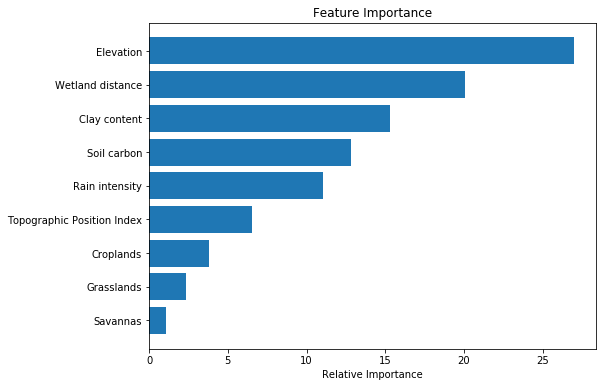

In [47]:
import matplotlib.pyplot as plt
# fea_imp = pd.DataFrame({'imp': catboost.feature_importances_, 'col': X.columns})
# fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
# fea_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 7), legend=None)
# plt.title('Feature Importance')
# plt.ylabel('Features')
# plt.xlabel('Importance');

feat_imp_data = sorted(list(zip(clean_columns, catboost.feature_importances_)), key=lambda datum: datum[1], reverse=False)

# Unzip the values and labels
widths = [x[1] for x in feat_imp_data]
yticks = [x[0] for x in feat_imp_data]
n_features = X.shape[1]

# Build the figure
plt.figure(figsize=(8,6))
plt.barh(range(n_features), widths, align='center') 
plt.yticks(np.arange(n_features), yticks) 
plt.xlabel("Relative Importance")
plt.title('Feature Importance')
plt.show();

#### Next Steps:
To improve model accuracy:

- Hyperparameter Tuning
- Source for more data